In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:85% !important; }</style>"))

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from joblib import load
from scipy.stats import uniform as sp_uniform
from matplotlib import rc, font_manager

font_path = "/Library/Fonts/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
fontprop = font_manager.FontProperties(fname=font_path, size=14)

from lightgbm import early_stopping, log_evaluation

from ml_classifiers import Classifiers

# Binary classification

## Load Dataset
- breast_cancer 데이터 적용 예시 (Binary classification)

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(
    breast_cancer["data"], columns=breast_cancer["feature_names"]
)
df_breast_cancer["label"] = breast_cancer["target"]
df_breast_cancer["label"].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: label, dtype: float64

## Create Object
- 객체를 생성해 주세요.
- Feature Scaler(`StandardScaler`, `MinMaxScaler`, `RobustScaler`, `MaxAbsScaler`, `Normalizer`)를 지정할 수 있습니다. 만약 이 외에 다른 표준화 방법을 적용하려면 데이터에 이미 적용이 되어 있음을 가정합니다.

In [3]:
clf = Classifiers(feature_scaler="RobustScaler")

## Algorithm List
- 모듈에 선언되어 있는 알고리즘을 확인해 봅니다. 이 외에 추가할 알고리즘이 있다면 모듈을 수정하여 사용할 수 있습니다.

In [4]:
list(clf.get_classifier_models())

['MLPClassifier',
 'KNeighborsClassifier',
 'SVC',
 'GaussianProcessClassifier',
 'DecisionTreeClassifier',
 'ExtraTreesClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GaussianNB',
 'QuadraticDiscriminantAnalysis',
 'GradientBoostingClassifier',
 'LogisticRegression',
 'XGBClassifier',
 'LGBMClassifier']

## Cross Validation
- 교차검증에 따른 성능을 확인해 봅니다.
- 이진 분류의 경우 `scoring`을 지정하지 않아도 `Accuracy`, `F1-score`, `Precision`, `Recall`, `ROC-AUC`를 자동으로 계산합니다.
- 이 외의 score도 확인하고 싶다면 모듈의 코드를 수정해 주세요.

In [5]:
# 모델별 파라미터를 지정할 수 있습니다.

estimator_fit_params = {
    "DecisionTreeClassifier": {
        "criterion": "entropy",
        "splitter": "random",
        "max_depth": 100,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
    },
    "RandomForestClassifier": {
        "n_estimators": 100,
        "criterion": "entropy",
        "max_depth": 10,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
        "bootstrap": True,
    },
}

- `estimators`: 예측 알고리즘
  - `estimators="all"`로 하면 해당 모듈에 선언된 모든 알고리즘을 사용하여 예측을 실행합니다.
- `data`: 훈련에 사용할 데이터셋 (`pd.DataFrame`)
- `target`: 데이터셋에서 예측할 변수
- `kfold`: 훈련, 검증 데이터 분할 방법
  - 클래스 불균형이 크다면 `Stratified`가 좋습니다.
- `n_splits`: K-Fold의 K 
  - 일반적으로 3, 5, 10을 많이 사용합니다.
- `n_repeats`: 교차 검증 반복 횟수
  - 기본값은 10입니다만, 5로 해도 충분한 것 같습니다. 단, `RepeatedStratifiedKFold`와 `RepeatedKFold`에 한해서 동작합니다.
- `estimator_fit_params`: 알고리즘별 파라미터
  - 알고리즘별 파라미터를 지정할 수 있습니다. 만약 사용하지 않는다면 디폴트 파라미터로 예측을 수행합니다.

In [6]:
clf.run_cross_validation(
    estimators=[
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "XGBClassifier",
        "LGBMClassifier",
    ],
    data=df_breast_cancer,
    target="label",
    kfold="RepeatedStratifiedKFold",
    n_splits=5,
    n_repeats=5,
    estimator_fit_params=estimator_fit_params,
)

 -------------- Start to create performance metric by estimator. -------------- 
 >>> DecisionTreeClassifier running... 
estimator_params: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> LGBMClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 1s) 
 ------------------------------------------------------------------------------ 
 >>> RandomForestClassifier running... 
estimator_params: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
fit_params: None
 Finished. (elapsed_time: 2s) 
 ------------------------------------------------------------------------------ 
 >>> XGBClassifier running... 
estimator_params: None
fit_params: None
 

,fit_time,score_time,test_score,scoring,estimator_name
0,0.000517,0.000180,0.938596,accuracy,DecisionTreeClassifier
1,0.000547,0.000192,0.929825,accuracy,DecisionTreeClassifier
2,0.000470,0.000168,0.929825,accuracy,DecisionTreeClassifier
3,0.000578,0.000195,0.947368,accuracy,DecisionTreeClassifier
4,0.000520,0.000172,0.929204,accuracy,DecisionTreeClassifier
...,...,...,...,...,...
495,0.051039,0.001083,0.979037,roc_auc,XGBClassifier
496,0.057522,0.001075,0.981002,roc_auc,XGBClassifier
497,0.084366,0.001036,0.999008,roc_auc,XGBClassifier
498,0.072349,0.001051,1.000000,roc_auc,XGBClassifier


### Performance Metrics
- 알고리즘별 예측 성능을 확인해 봅니다.

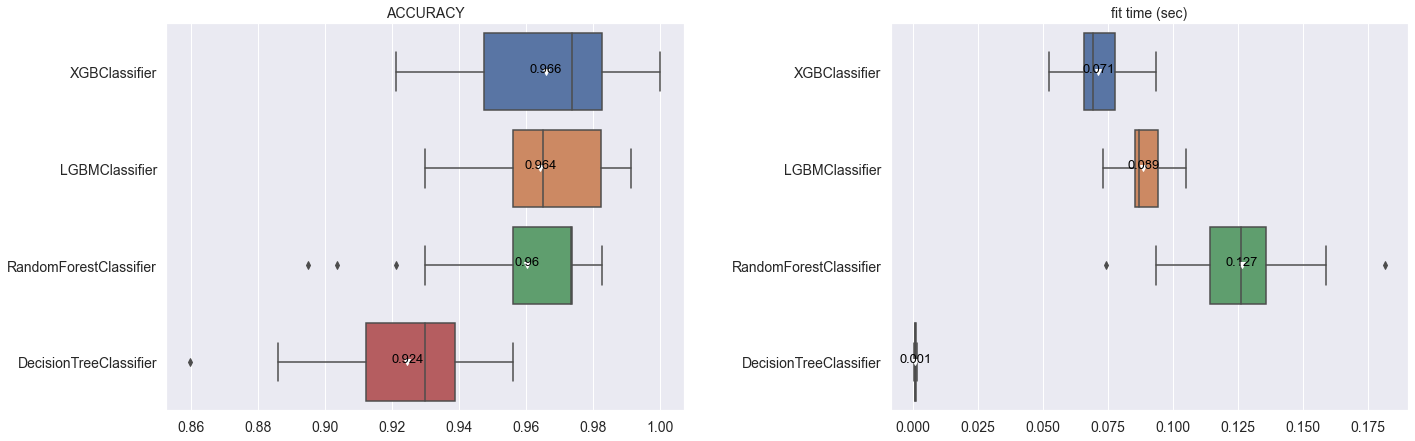

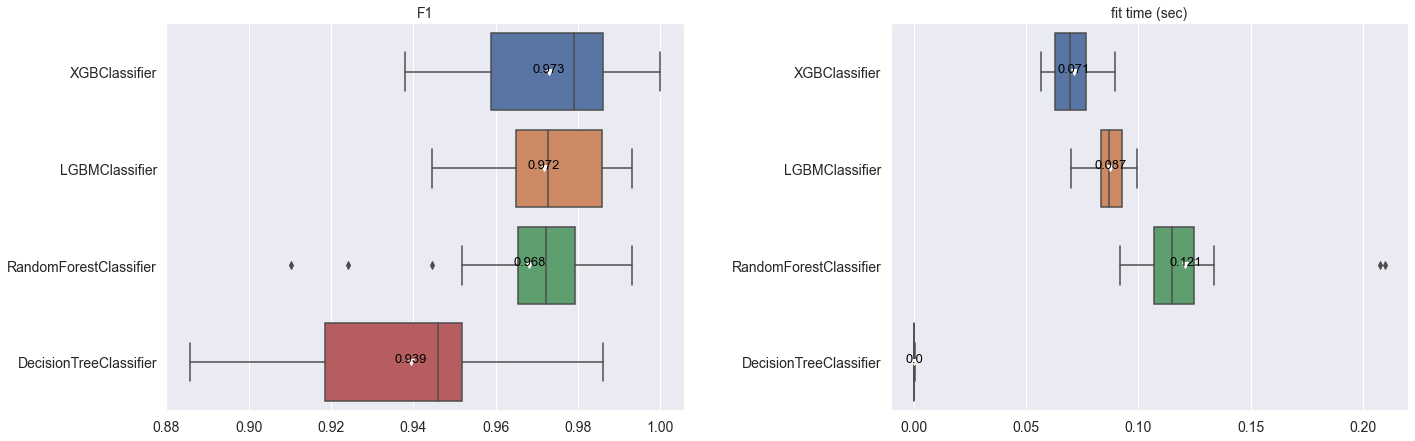

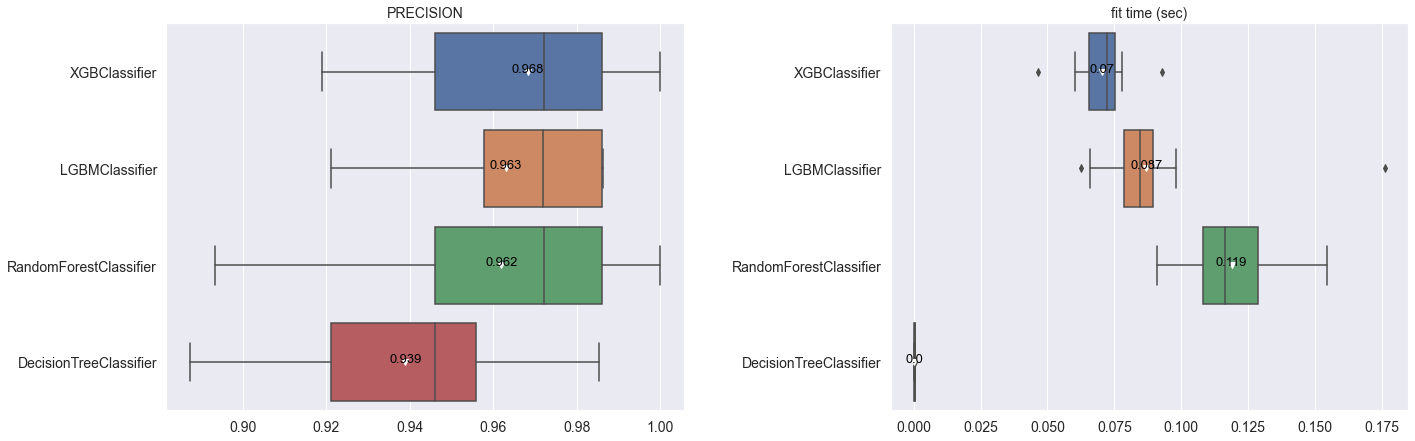

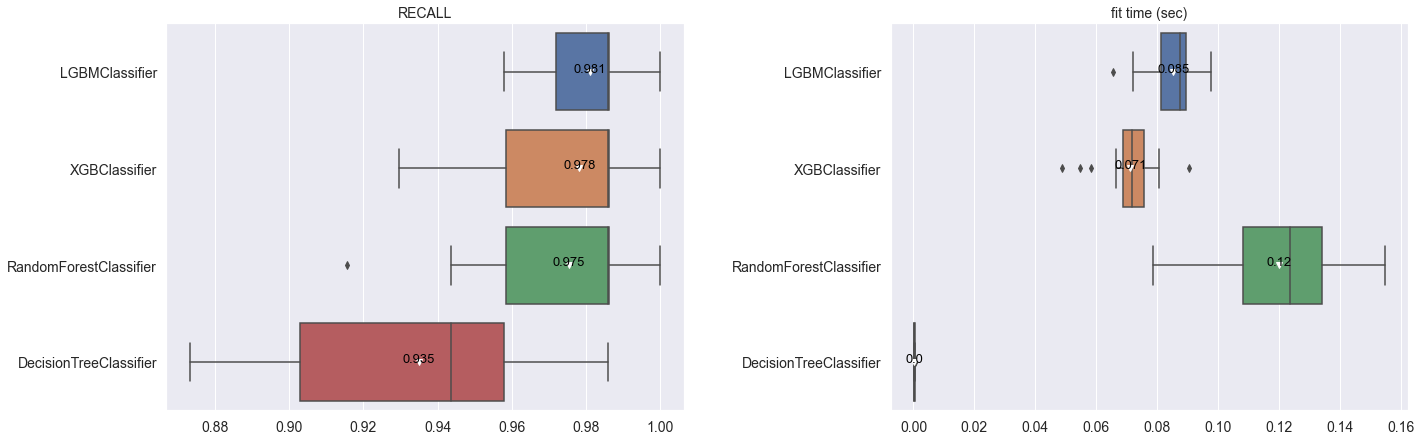

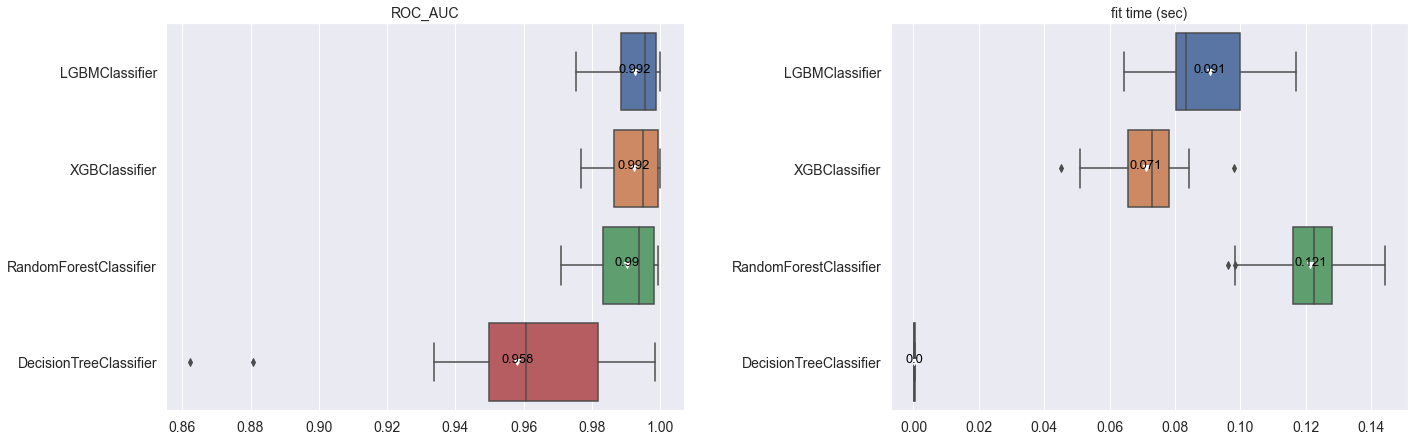

In [7]:
clf.show_cross_validation_result()

## Search Hyperparameters
- 파라미터 그리드(grid)를 생성하고, 하이퍼파라미터 튜닝을 통해 알고리즘별 성능을 확인해 봅니다.

In [8]:
hyperparams_space = {
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
    },
    "RandomForestClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "criterion": ["gini", "entropy"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
    },
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["logloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["binary_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

- `data`: 훈련에 사용할 데이터셋 (`pd.DataFrame`)
- `target`: 데이터셋에서 예측할 변수
- `hyperparams_space`: 하이퍼파라미터 그리드
- `search_method`: 하이퍼파라미터 탐색 방법
    - `grid`, `random`, `grid_halving`, `random_halving` 중 선택 가능
- `kfold`: 훈련, 검증 데이터 분할 방법
- `n_splits`: K-Fold의 K
- `n_repeats`: 교차 검증 반복 횟수
- `scoring`: 예측 성능 지표
- `n_iter`: 파라미터 조합 수
- `factor`: 파라미터 선택 수
    - `search_method`가 `*_havling`일 때만 적용

In [9]:
df = clf.search_hyperparameter(
    data=df_breast_cancer,
    target="label",
    search_method="random",
    hyperparams_space=hyperparams_space,
    kfold="RepeatedStratifiedKFold",
    scoring="roc_auc",
    n_splits=5,
    n_repeats=5,
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> DecisionTreeClassifier running... 
param_grid:
{'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'splitter': ['best', 'random']}
fit_params: None
 Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> LGBMClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12646acd0>,
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.0

### Performance Metrics
- 튜닝 성능을 확인해 봅니다.

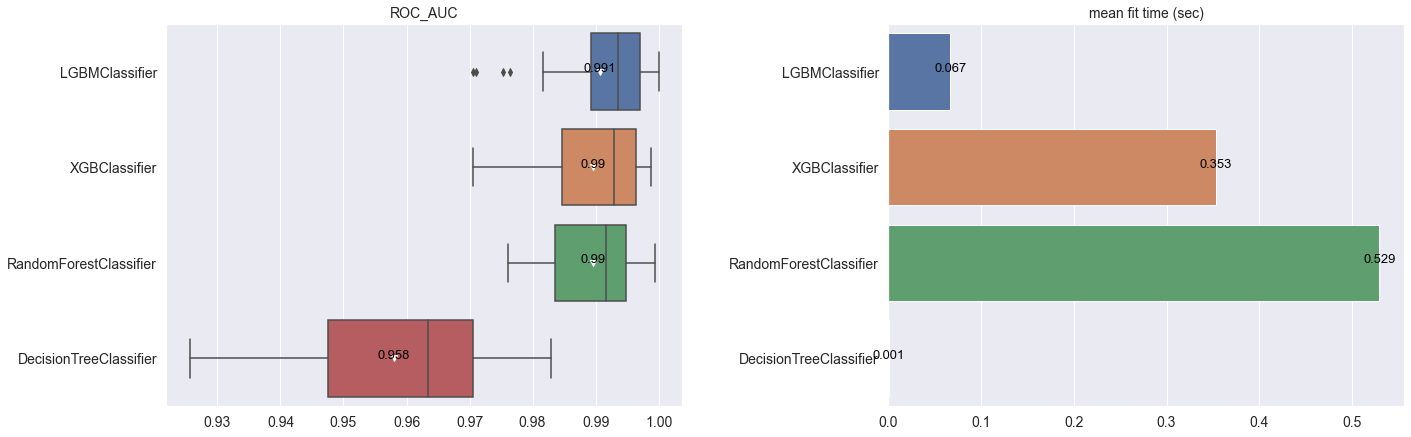

In [10]:
clf.show_hyperparameter_search_result()

## Feature Importance
- 튜닝한 모델의 `Feature Importances`를 확인해 봅니다.

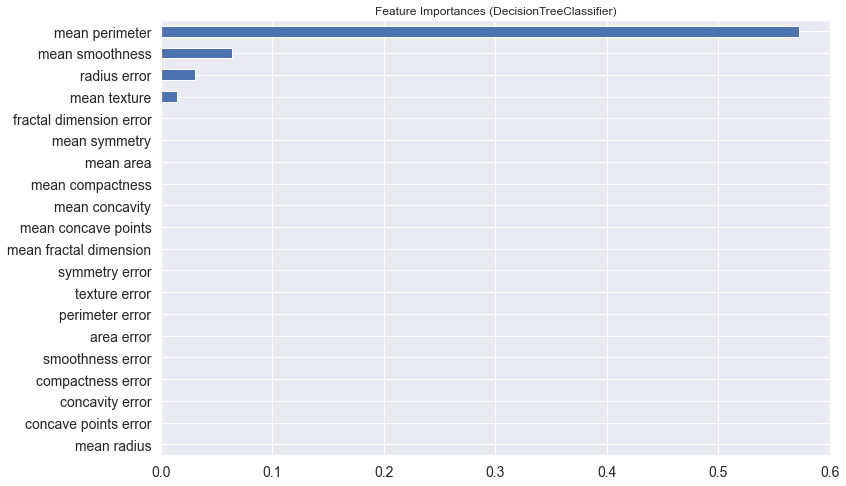

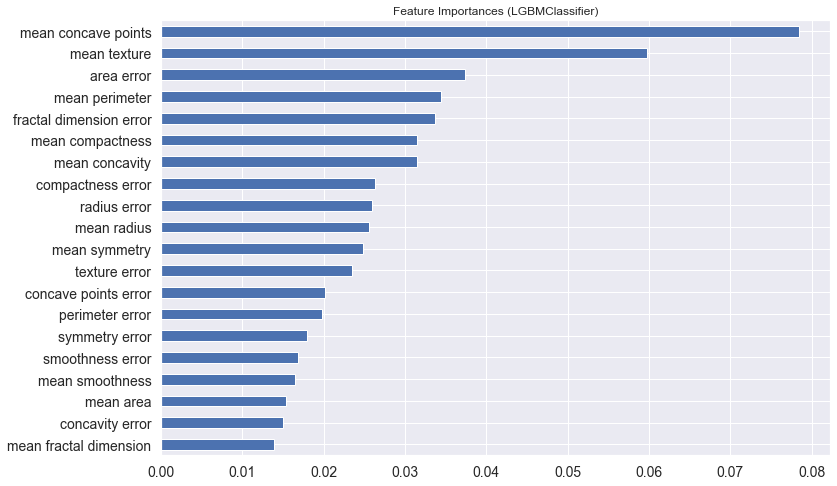

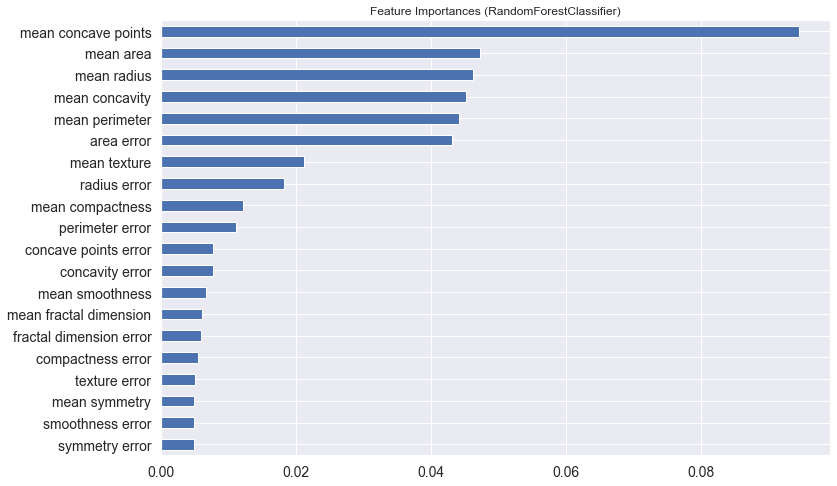

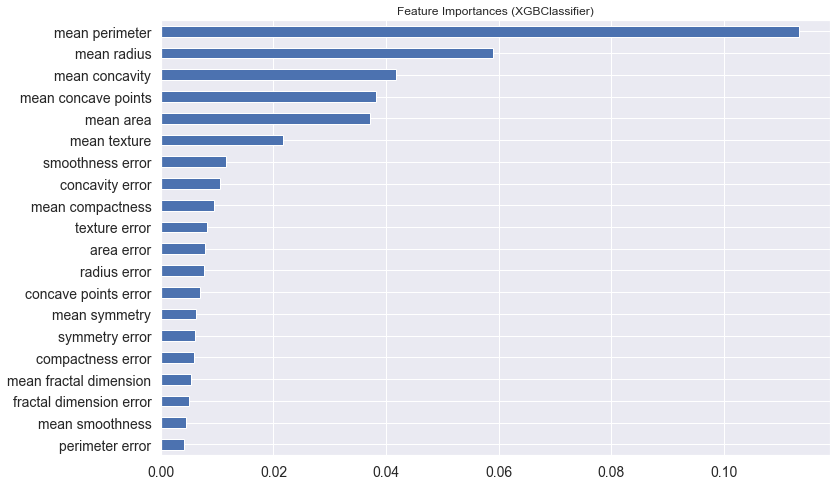

In [11]:
clf.show_feature_importances(n_features=20)  # 상위 20개까지만 추출합니다. (기본값: 10)

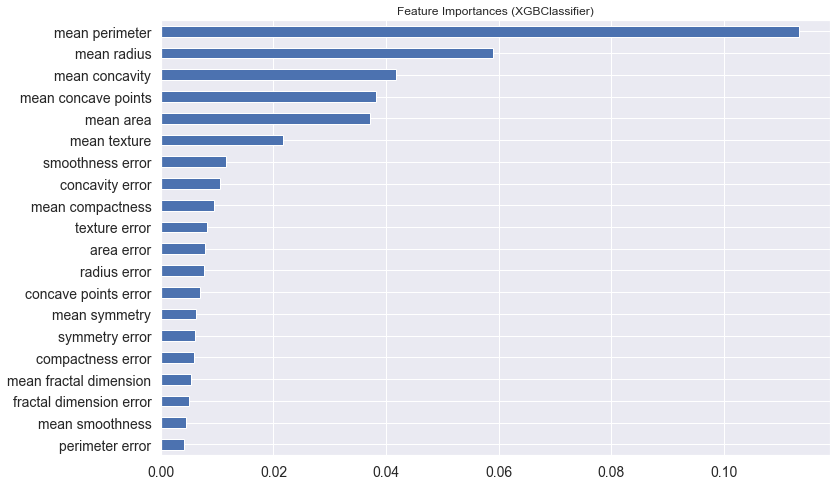

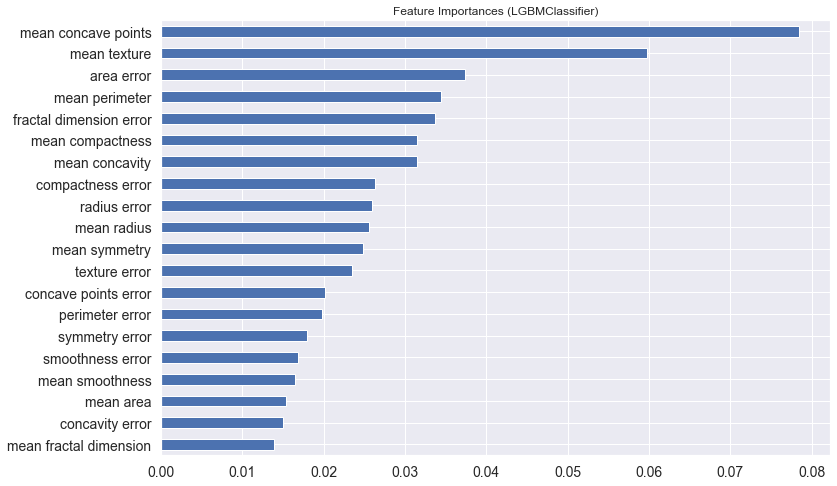

In [12]:
# 모델과 feature의 개수를 지정할 수도 있습니다.
clf.show_feature_importances(
    estimators=["XGBClassifier", "LGBMClassifier"],
    n_features=20,  # 상위 20개까지만 추출합니다. (기본값: 10)
)

## Permutation Importances
- 튜닝한 모델의 Permutation Importances를 확인해 봅니다.

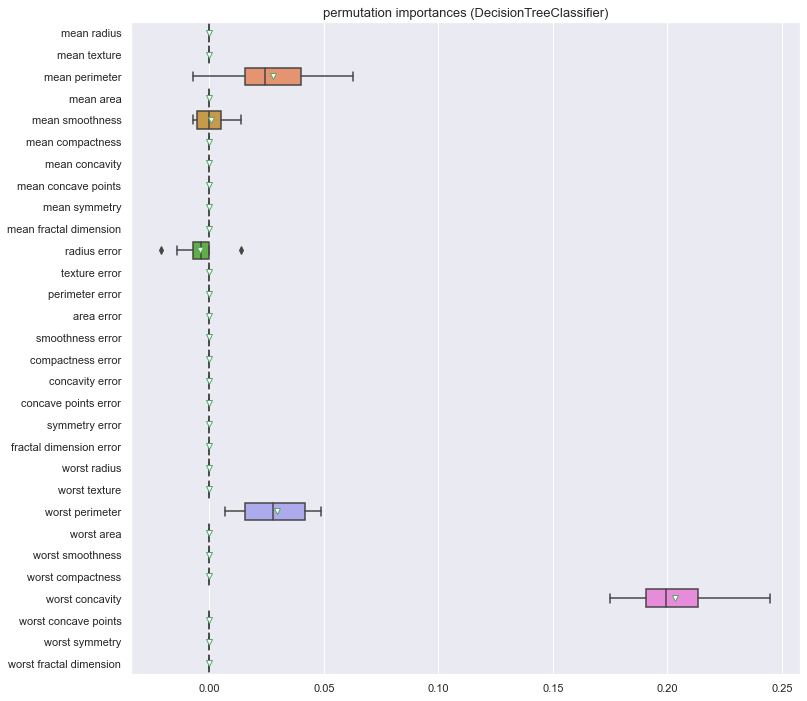

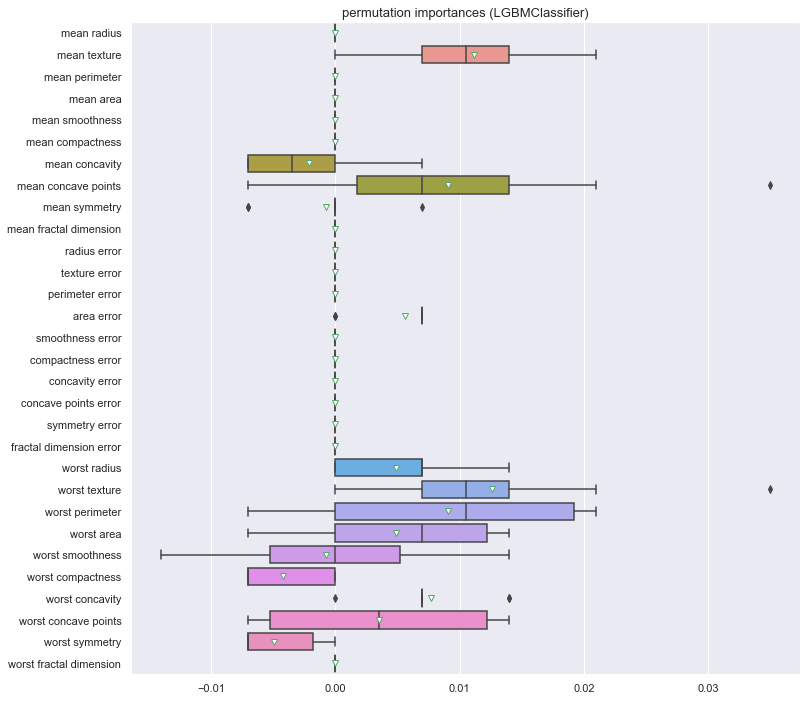

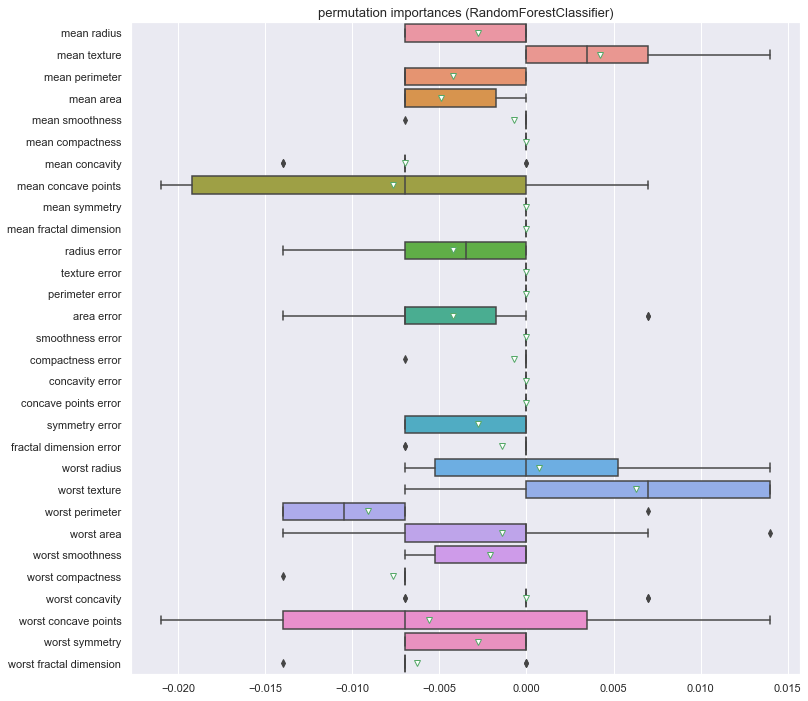

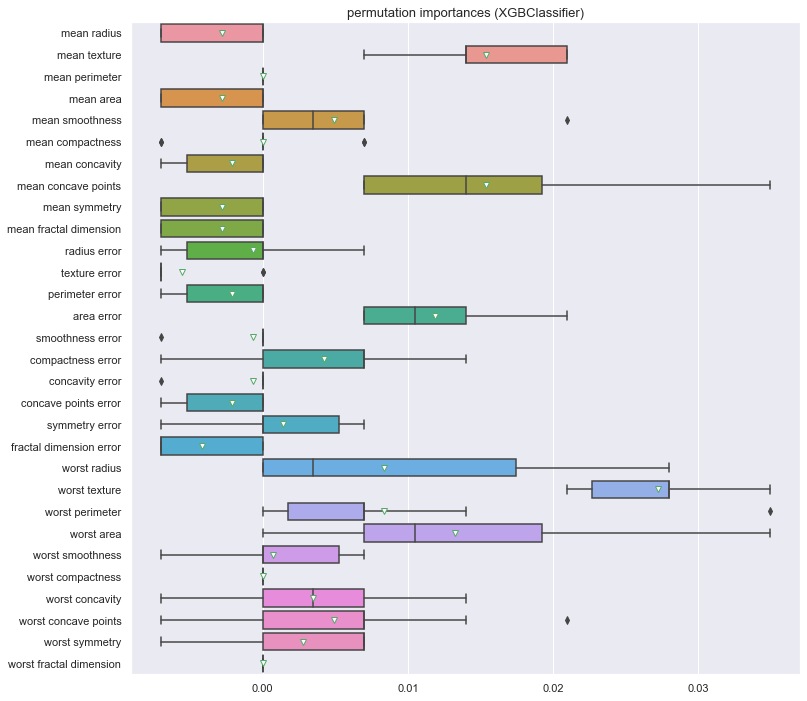

In [13]:
clf.show_permutation_importances(data=df_breast_cancer, target="label")

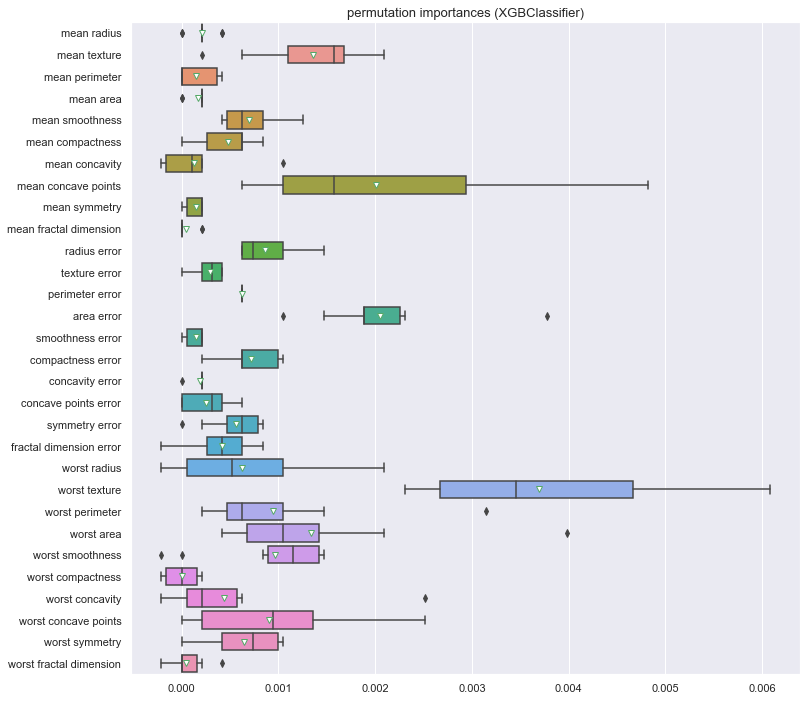

In [14]:
# 모델과 score를 따로 지정할 수도 있습니다.
clf.show_permutation_importances(
    estimators=["XGBClassifier"],
    data=df_breast_cancer,
    target="label",
    scoring="roc_auc",
)

##  Search Hyperparameters again
- 모델을 다시 튜닝해봅니다.
- 이미 `clf` 인스턴스가 만들어져 있으니 `search_hyperparameter()` 메서드만 재사용하시면 됩니다.
- 모델의 후보를 좁히거나, Feature를 바꾸거나, `search`, `kfold`, `n_splits` 등 파라미터 변경을 반복하여 사용할 수 있습니다.

In [15]:
hyperparams_space = {
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
    },
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["logloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["binary_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

clf.search_hyperparameter(
    data=df_breast_cancer,
    target="label",
    hyperparams_space=hyperparams_space,
    search_method="random",
    kfold="StratifiedKFold",
    scoring="roc_auc",
    n_splits=10,
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> DecisionTreeClassifier running... 
param_grid:
{'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'splitter': ['best', 'random']}
fit_params: None
 Best Parameters: {'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> LGBMClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x127a81820>,
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[186]	valid_0's binary_logloss: 0.0480702
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.0734516
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[196]	valid_0's binary_logloss: 0.0472865
Early stopping, best iteration is:
[196]	valid_0's binary_logloss: 0.0472865
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.0471211
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.0471211
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[145]	valid_0's binary_logloss: 0.0582256
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.0484267
Training until validation scores don

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[234]	valid_0's binary_logloss: 0.031053
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[259]	valid_0's binary_logloss: 0.0392931
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[211]	valid_0's binary_logloss: 0.0430334
Did not meet early stopping. Best iteration is:
[211]	valid_0's binary_logloss: 0.0430334
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.0494339
Did not meet early stopping. Best iteration is:
[172]	valid_0's binary_logloss: 0.0299061
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.0514703
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.0514703
Training until validation scores don

[600]	valid_0's binary_logloss: 0.359585
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[600]	valid_0's binary_logloss: 0.371214
Did not meet early stopping. Best iteration is:
[600]	valid_0's binary_logloss: 0.364733
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.055357
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.055357
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0666349
Did not meet early stopping. Best iteration is:
[299]	valid_0's binary_logloss: 0.0447561
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.0581741
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.0522533
Training until validati

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[184]	valid_0's binary_logloss: 0.03848
 Best Parameters: {'colsample_bytree': 0.6322549242324608, 'learning_rate': 0.05099999999999999, 'max_depth': 60, 'n_estimators': 200, 'objective': 'binary', 'verbose': -1} 
 Finished. (elapsed_time: 12s) 
------------------------------------------------------------------------------
 >>> XGBClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1268b1fd0>,
 'early_stopping_rounds': [100],
 'eval_metric': ['logloss'],
 'gamma': [0.0, 0.1, 0.2],
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'objective': ['binary:

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,std_train_score,estimator_name,param_colsample_bytree,param_learning_rate,param_n_estimators,param_objective,param_verbose,param_early_stopping_rounds,param_eval_metric,param_gamma
0,0.000293,0.000061,0.000383,0.000037,random,5,6,sqrt,95,entropy,...,0.008244,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000550,0.000044,0.000349,0.000020,best,3,4,log2,55,gini,...,0.001041,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000696,0.000161,0.000372,0.000044,best,6,5,sqrt,95,gini,...,0.000932,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000663,0.000073,0.000349,0.000035,best,5,8,sqrt,5,entropy,...,0.001688,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000599,0.000128,0.000384,0.000057,best,6,9,log2,60,gini,...,0.002590,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.639035,0.061343,0.001764,0.001218,NaN,NaN,NaN,NaN,60,NaN,...,0.000000,XGBClassifier,0.796731,0.011,500,binary:logistic,NaN,100,logloss,0.0
146,0.178042,0.062548,0.002148,0.001329,NaN,NaN,NaN,NaN,45,NaN,...,0.000000,XGBClassifier,0.599313,0.071,200,binary:logistic,NaN,100,logloss,0.2
147,0.234704,0.031654,0.002299,0.002167,NaN,NaN,NaN,NaN,15,NaN,...,0.000017,XGBClassifier,0.613589,0.021,200,binary:logistic,NaN,100,logloss,0.1
148,0.207210,0.029985,0.001148,0.000041,NaN,NaN,NaN,NaN,5,NaN,...,0.000000,XGBClassifier,0.938691,0.091,400,binary:logistic,NaN,100,logloss,0.1


## Best Model
- 최종 모델을 확인해 봅니다. 이 코드를 실행하는 경로 내의 `model_savled` 폴더에 `.joblib` 파일로 생성되어 있습니다.

In [16]:
clf.get_best_model_info()

{'mean_test_score': 0.9906321225071224,
 'std_test_score': 0.010172303138195405,
 'mean_fit_time': 0.11200101375579834,
 'estimator_name': 'LGBMClassifier',
 'params': {'colsample_bytree': 0.9031177175390277,
  'learning_rate': 0.08099999999999999,
  'max_depth': 40,
  'n_estimators': 900,
  'objective': 'binary',
  'verbose': -1}}

In [17]:
# 최종 선택된 모델로 다시 예측해 봅니다.
features = df_breast_cancer.iloc[:, :-1].values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

best_model = clf.get_best_classifier()
pred = best_model.predict(features_scaled)

print(accuracy_score(df_breast_cancer["label"], pred))

 >>> Predict from new data. 
0.9947275922671354


## Load Model
- 로컬에 저장되어 있던 모델을 로드하여 실제 데이터로 다시 예측을 해봅니다. (`LGBMClassifier`이 저장된 것으로 가정)
- 이렇게 모델을 주기적으로 업데이트하여 저장해놓고, 업데이트된 모델을 실 예측에 사용하는 파이프라인 배치를 만들면 됩니다.

In [18]:
model = load("model_saved/LGBMClassifier.joblib")
pred = model.predict(X=features_scaled)

print(accuracy_score(df_breast_cancer["label"], pred))

0.9947275922671354


## Decision Tree
- (Appendix) `Decision Tree`를 튜닝한 경우, 트리 구조를 시각화해봅니다.

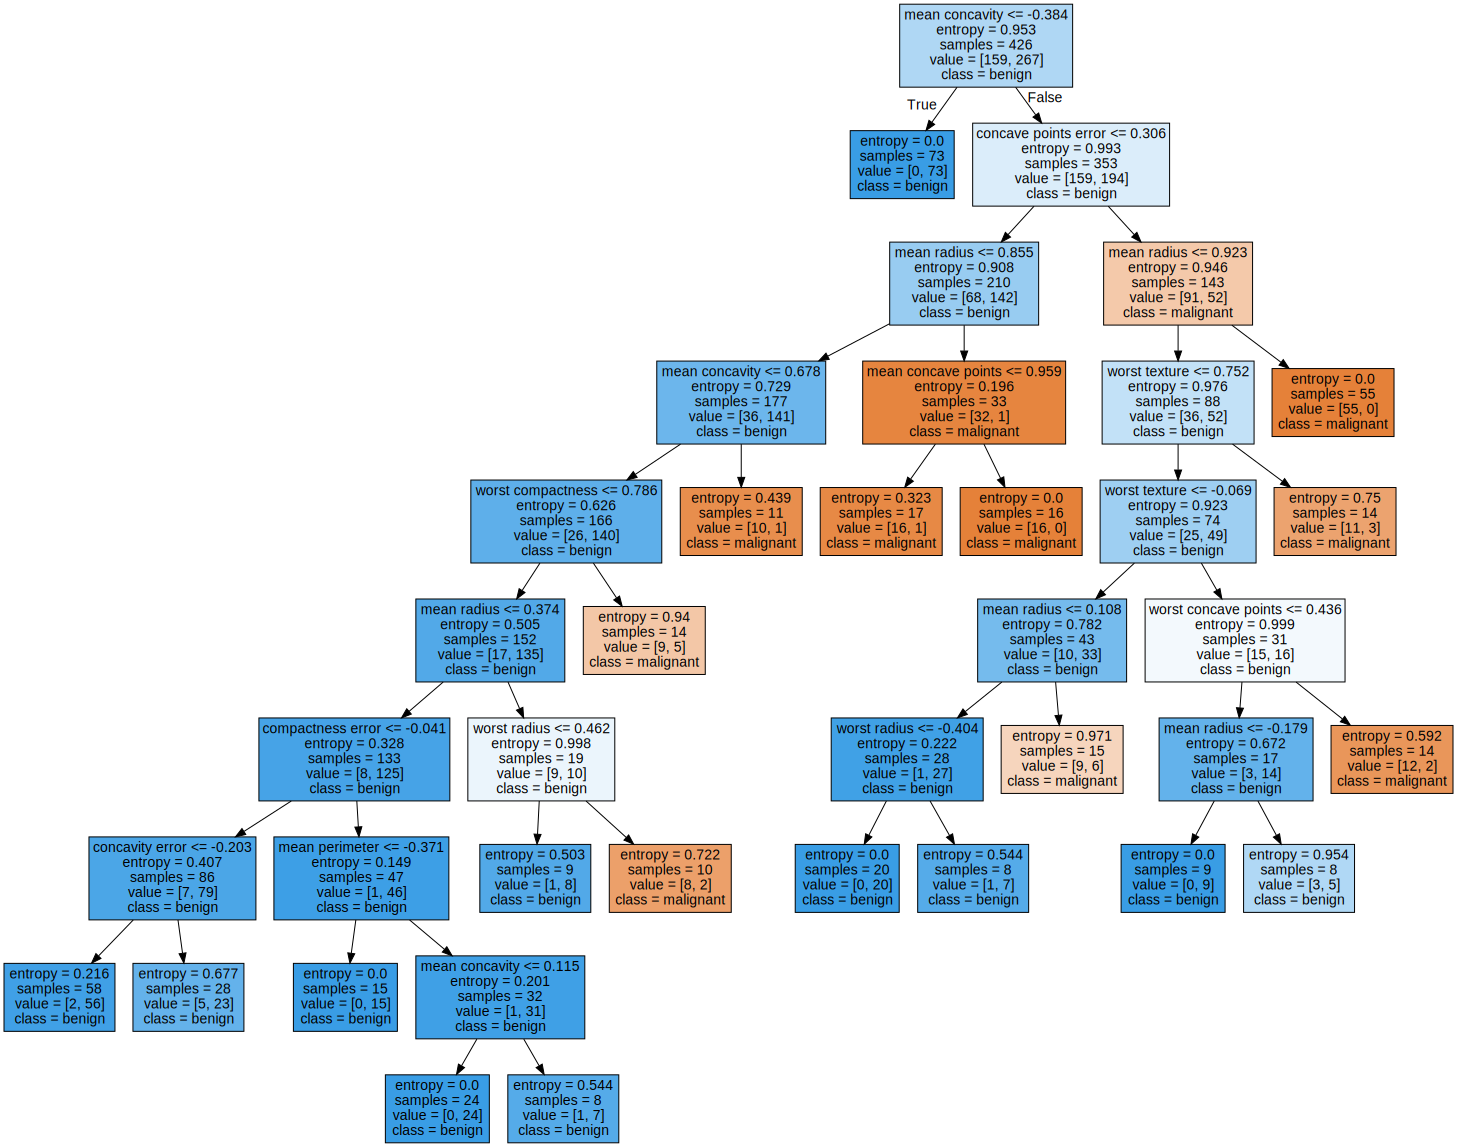

In [19]:
clf.show_decision_tree(
    feature_names=df_breast_cancer.columns[:-1], class_names=breast_cancer.target_names
)

# Multiclass classification

## Load Dataset
- wine 데이터 적용 예시 (Multiclass classification)

In [20]:
from sklearn.datasets import load_wine

wine = load_wine()
df_wine = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df_wine["label"] = wine["target"]
df_wine["label"].value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: label, dtype: float64

## Create Object
- 객체를 생성해 주세요.
- Feature Scaler(`StandardScaler`, `MinMaxScaler`, `RobustScaler`, `MaxAbsScaler`, `Normalizer`)를 지정할 수 있습니다. 만약 이 외에 다른 표준화 방법을 적용하려면 데이터에 이미 적용이 되어 있음을 가정합니다.

In [21]:
clf_new = Classifiers(feature_scaler="RobustScaler")

## Algorithm List
- 모듈에 선언되어 있는 알고리즘을 확인해 봅니다. 이 외에 추가할 알고리즘이 있다면 모듈을 수정하여 사용할 수 있습니다.

In [22]:
list(clf.get_classifier_models())

['MLPClassifier',
 'KNeighborsClassifier',
 'SVC',
 'GaussianProcessClassifier',
 'DecisionTreeClassifier',
 'ExtraTreesClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GaussianNB',
 'QuadraticDiscriminantAnalysis',
 'GradientBoostingClassifier',
 'LogisticRegression',
 'XGBClassifier',
 'LGBMClassifier']

## Cross Validation
- 교차검증에 따른 성능을 확인해 봅니다.

In [23]:
# 모델별 파라미터를 지정할 수 있습니다.

estimator_fit_params = {
    "DecisionTreeClassifier": {
        "criterion": "entropy",
        "splitter": "random",
        "max_depth": 100,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
    },
    "RandomForestClassifier": {
        "n_estimators": 100,
        "criterion": "entropy",
        "max_depth": 10,
        "min_samples_split": 3,
        "min_samples_leaf": 3,
        "max_features": "sqrt",
        "bootstrap": True,
    },
}

- `estimators`: 예측 알고리즘
  - `estimators="all"`로 하면 해당 모듈에 선언된 모든 알고리즘을 사용하여 예측을 실행합니다.
- `data`: 훈련에 사용할 데이터셋 (`pd.DataFrame`)
- `target`: 데이터셋에서 예측할 변수
- `kfold`: 훈련, 검증 데이터 분할 방법
  - 클래스 불균형이 크다면 `Stratified`가 좋습니다.
- `n_splits`: K-Fold의 K 
  - 일반적으로 3, 5, 10을 많이 사용합니다.
- `n_repeats`: 교차 검증 반복 횟수
  - 기본값은 10입니다만, 5로 해도 충분한 것 같습니다. 단, `RepeatedStratifiedKFold`와 `RepeatedKFold`에 한해서 동작합니다.
- `estimator_fit_params`: 알고리즘별 파라미터
  - 알고리즘별 파라미터를 지정할 수 있습니다. 만약 사용하지 않는다면 디폴트 파라미터로 예측을 수행합니다.

In [24]:
# 모델별 교차검증에 따른 성능을 확인해 봅니다.
clf_new.run_cross_validation(
    estimators="all",
    data=df_wine,
    target="label",
    kfold="RepeatedStratifiedKFold",
    n_splits=5,
    n_repeats=5,
    scoring="accuracy",
    estimator_fit_params=estimator_fit_params,
)

 -------------- Start to create performance metric by estimator. -------------- 
 >>> AdaBoostClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> DecisionTreeClassifier running... 
estimator_params: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 100, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> ExtraTreesClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> GaussianNB running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> GaussianProcessClassifier running

/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniforge3/miniforge3/envs/ds_p39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> QuadraticDiscriminantAnalysis running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> RandomForestClassifier running... 
estimator_params: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> SVC running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 ------------------------------------------------------------------------------ 
 >>> XGBClassifier running... 
estimator_params: None
fit_params: None
 Finished. (elapsed_time: 0s) 
 -------------------------------------------------------------------------

,fit_time,score_time,test_score,scoring,estimator_name
0,0.027811,0.003181,0.861111,accuracy,AdaBoostClassifier
1,0.032820,0.002052,0.944444,accuracy,AdaBoostClassifier
2,0.033763,0.005110,0.888889,accuracy,AdaBoostClassifier
3,0.041267,0.006473,0.885714,accuracy,AdaBoostClassifier
4,0.057187,0.002005,0.800000,accuracy,AdaBoostClassifier
...,...,...,...,...,...
345,0.023443,0.000642,0.944444,accuracy,XGBClassifier
346,0.030378,0.000807,1.000000,accuracy,XGBClassifier
347,0.022637,0.000893,0.972222,accuracy,XGBClassifier
348,0.018764,0.001053,0.942857,accuracy,XGBClassifier


### Performance Metrics
- 알고리즘별 예측 성능을 확인해 봅니다.

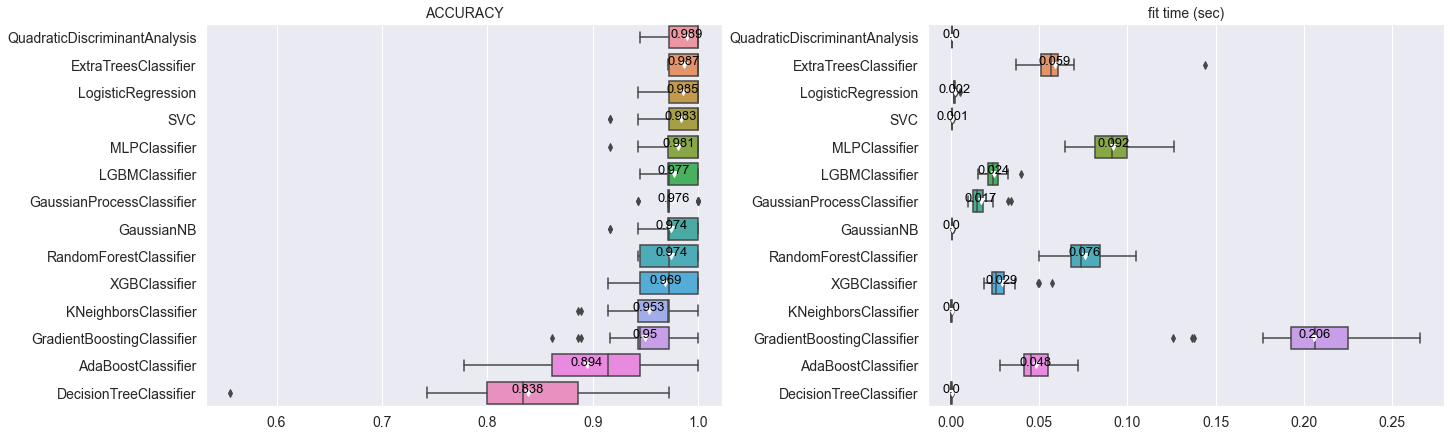

In [25]:
clf_new.show_cross_validation_result()

## Search Hyperparameters
- 파라미터 그리드(grid)를 생성하고, 하이퍼파라미터 튜닝을 통해 알고리즘별 성능을 확인해 봅니다.

In [26]:
# 하이퍼파라미터 튜닝을 시도할 모델을 지정하고 파라미터 grid를 생성해 줍니다.
hyperparams_space = {
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
    },
    "RandomForestClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "criterion": ["gini", "entropy"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
        "bootstrap": [True, False],
    },
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["mlogloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["multi_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

- `data`: 훈련에 사용할 데이터셋 (`pd.DataFrame`)
- `target`: 데이터셋에서 예측할 변수
- `hyperparams_space`: 하이퍼파라미터 그리드
- `search_method`: 하이퍼파라미터 탐색 방법
    - `grid`, `random`, `grid_halving`, `random_halving` 중 선택 가능
- `kfold`: 훈련, 검증 데이터 분할 방법
- `n_splits`: K-Fold의 K
- `n_repeats`: 교차 검증 반복 횟수
- `scoring`: 예측 성능 지표
- `n_iter`: 파라미터 조합 수
- `factor`: 파라미터 선택 수
    - `search_method`가 `*_havling`일 때만 적용

In [27]:
# 하이퍼파라미터 튜닝 결과를 생성합니다.
clf_new.search_hyperparameter(
    data=df_wine,
    target="label",
    hyperparams_space=hyperparams_space,
    search_method="random",
    kfold="RepeatedStratifiedKFold",
    scoring="accuracy",
    n_splits=5,
    n_repeats=5,
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> DecisionTreeClassifier running... 
param_grid:
{'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'splitter': ['best', 'random']}
fit_params: None
 Best Parameters: {'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> LGBMClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12634d070>,
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0934735
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0718613
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.0724486
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.0698838
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.0563607
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.0563607
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.0814979
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.0666286
Training until validation scores

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[581]	valid_0's multi_logloss: 0.0593377
 Best Parameters: {'colsample_bytree': 0.5456462214903447, 'learning_rate': 0.011, 'max_depth': 5, 'n_estimators': 800, 'objective': 'multiclass', 'verbose': -1} 
 Finished. (elapsed_time: 11s) 
------------------------------------------------------------------------------
 >>> RandomForestClassifier running... 
param_grid:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])}
fit_params: None
 Best Parameters: {'n_estimators': 600, 'min_samples_split': 2, 'min_sa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,estimator_name,param_colsample_bytree,param_learning_rate,param_n_estimators,param_objective,param_verbose,param_bootstrap,param_early_stopping_rounds,param_eval_metric,param_gamma
0,0.000199,0.000037,0.000087,0.000013,best,3,8,sqrt,50,entropy,...,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000173,0.000027,0.000081,0.000010,best,9,5,sqrt,75,gini,...,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000174,0.000102,0.000095,0.000051,random,7,4,log2,90,entropy,...,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000130,0.000021,0.000078,0.000009,random,2,7,sqrt,35,entropy,...,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000170,0.000018,0.000077,0.000008,best,10,10,sqrt,45,entropy,...,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.122520,0.011116,0.001480,0.001053,NaN,NaN,NaN,NaN,70,NaN,...,XGBClassifier,0.412021,0.021,400,multi:softprob,NaN,NaN,100,mlogloss,0.1
196,0.205929,0.081519,0.001089,0.000476,NaN,NaN,NaN,NaN,20,NaN,...,XGBClassifier,0.749008,0.081,1000,multi:softprob,NaN,NaN,100,mlogloss,0.2
197,0.091394,0.012988,0.001473,0.001936,NaN,NaN,NaN,NaN,60,NaN,...,XGBClassifier,0.589208,0.081,400,multi:softprob,NaN,NaN,100,mlogloss,0.1
198,0.124442,0.026085,0.001226,0.000580,NaN,NaN,NaN,NaN,90,NaN,...,XGBClassifier,0.6192,0.051,500,multi:softprob,NaN,NaN,100,mlogloss,0.1


### Performance Metrics
- 튜닝 성능을 확인해 봅니다.

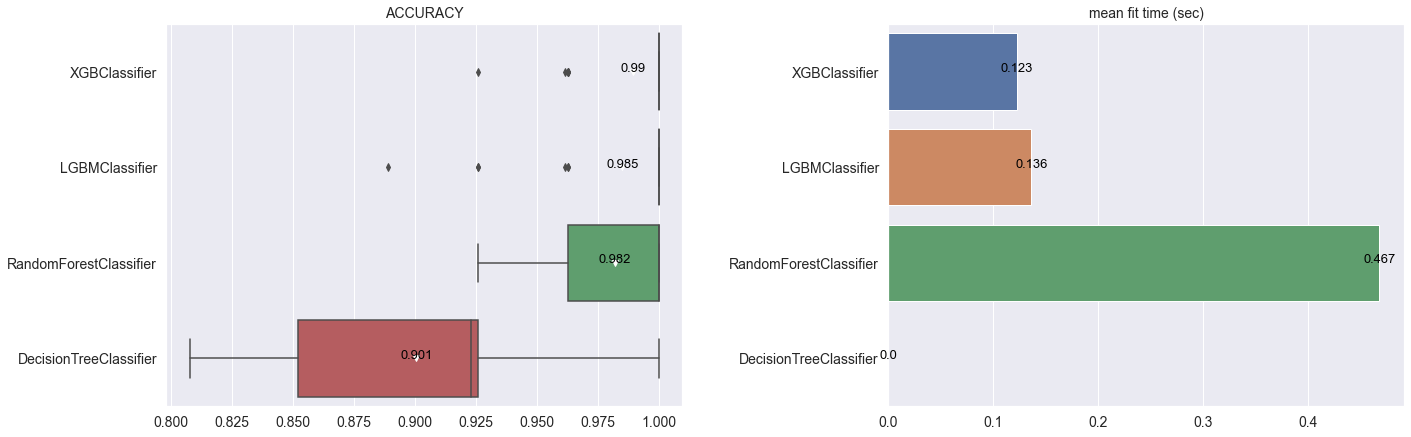

In [28]:
clf_new.show_hyperparameter_search_result()

## Feature Importance
- 튜닝한 모델의 `Feature Importances`를 확인해 봅니다.

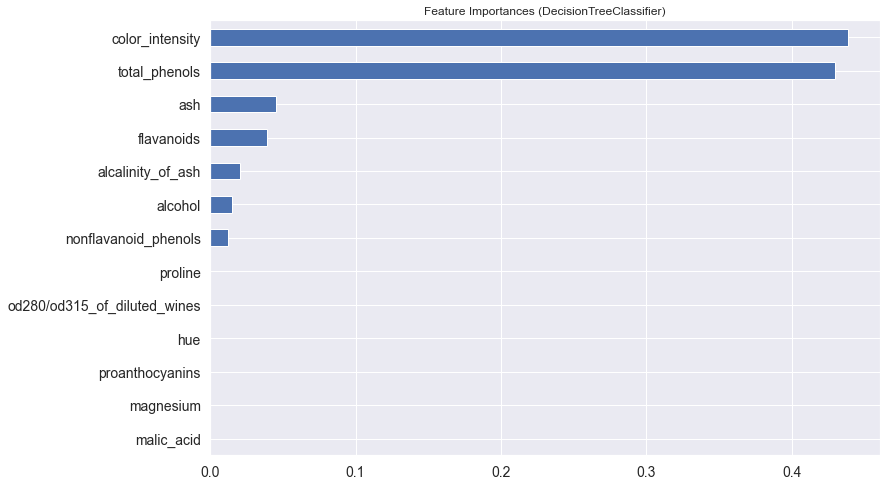

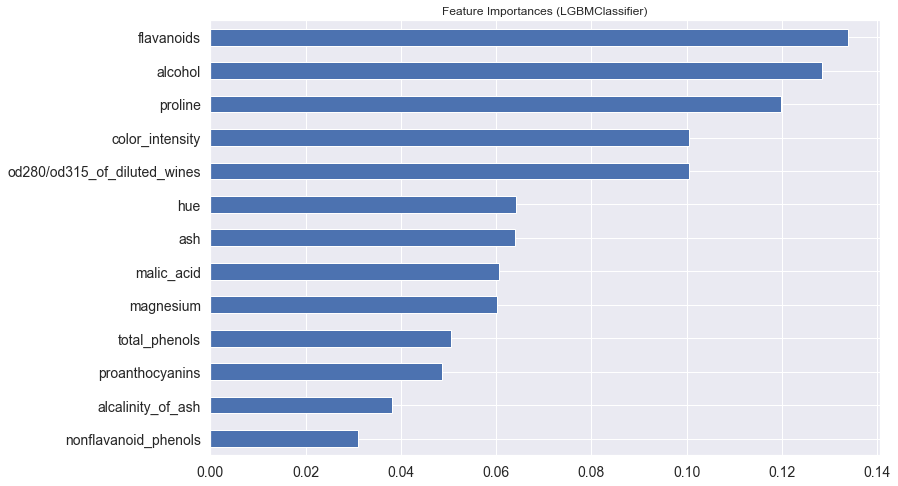

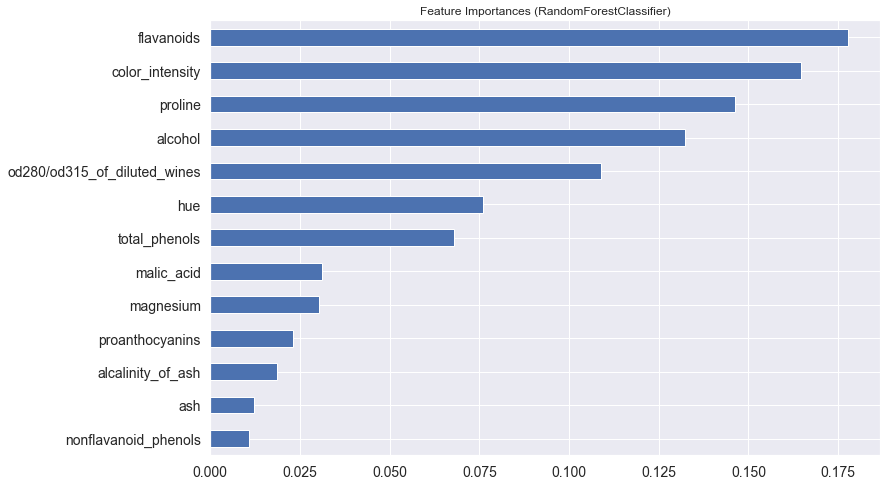

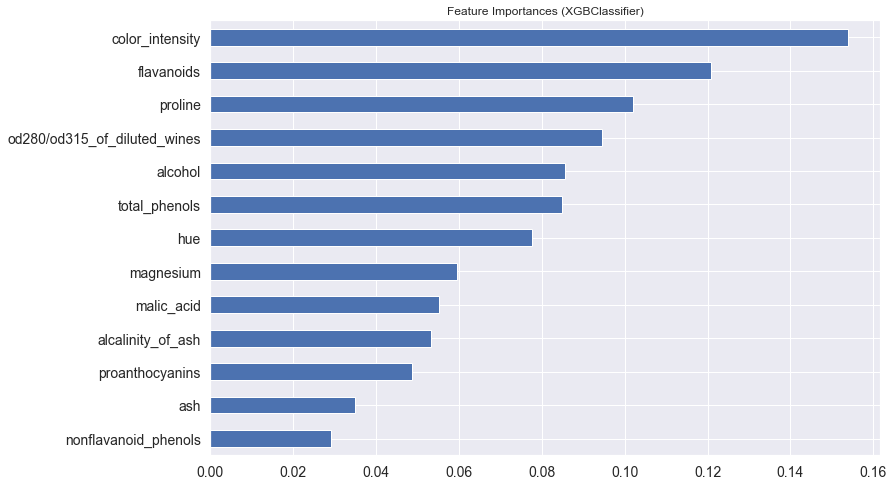

In [29]:
clf_new.show_feature_importances(n_features=20)  # 상위 20개까지만 추출합니다. (기본값: 10)

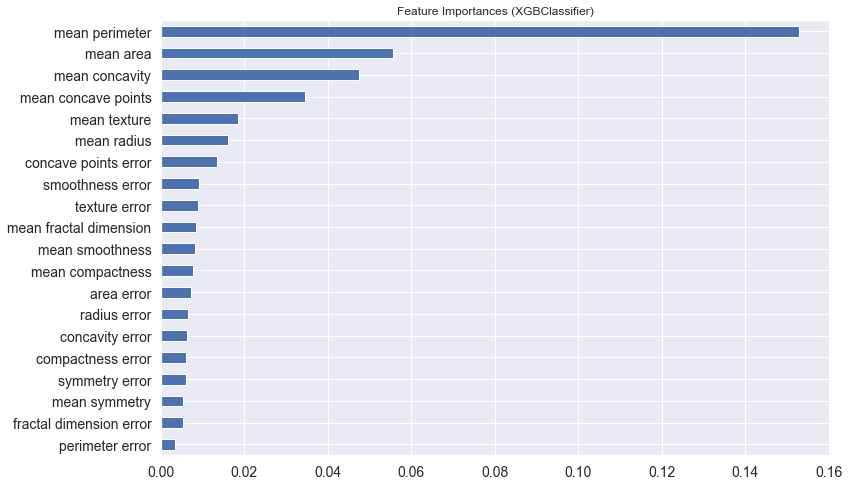

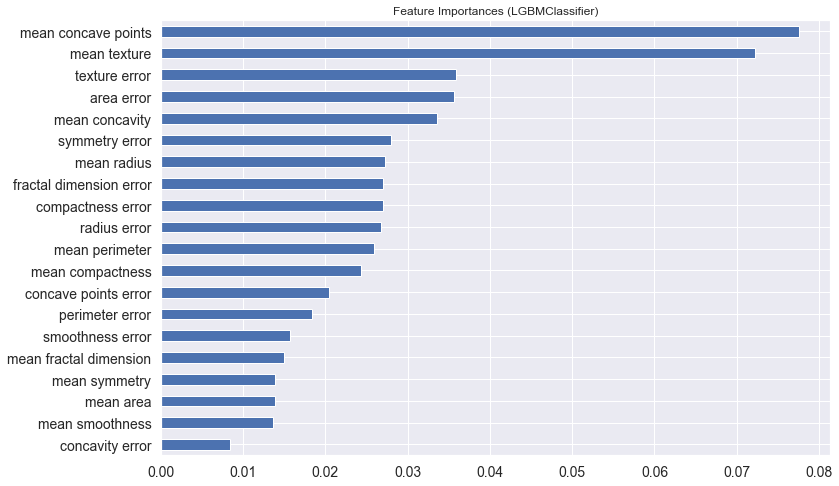

In [30]:
# 모델과 feature의 개수를 지정할 수도 있습니다.
clf.show_feature_importances(
    estimators=["XGBClassifier", "LGBMClassifier"],
    n_features=20,  # 상위 20개까지만 추출합니다. (기본값: 10)
)

## Permutation Importances
- 튜닝한 모델의 `Permutation Importances`를 확인해 봅니다.

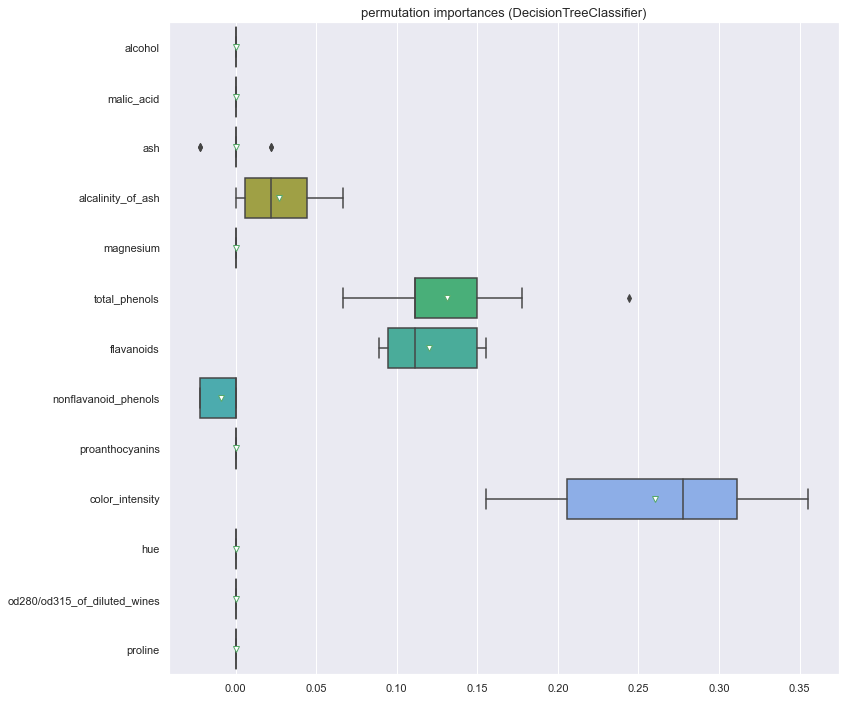

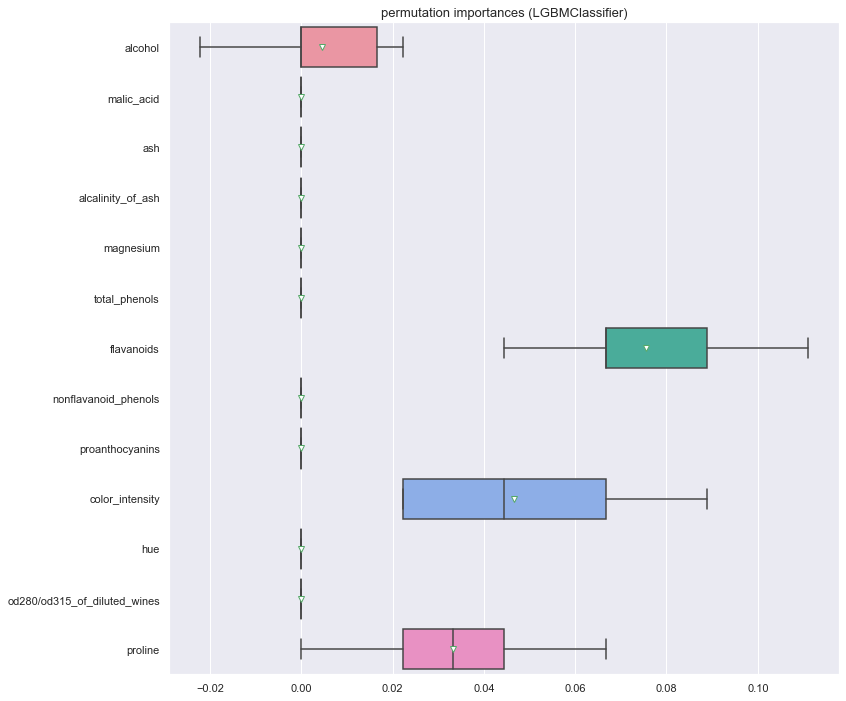

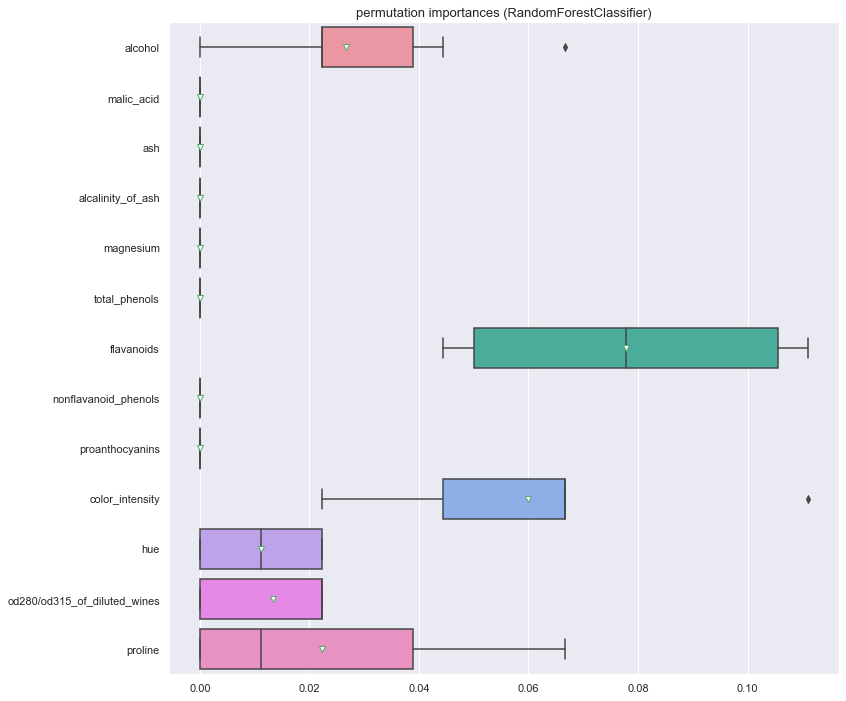

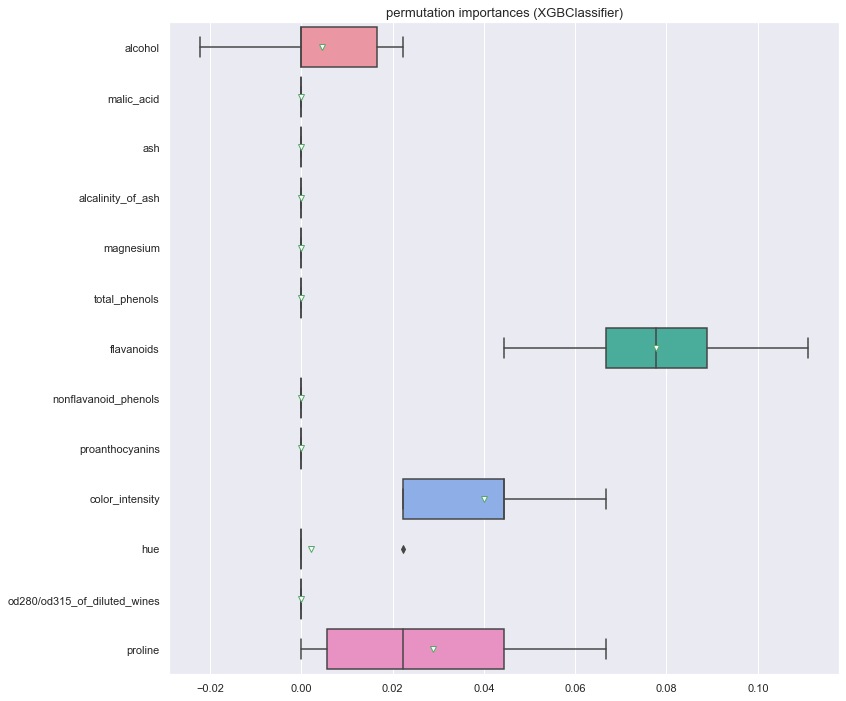

In [31]:
clf_new.show_permutation_importances(data=df_wine, target="label")

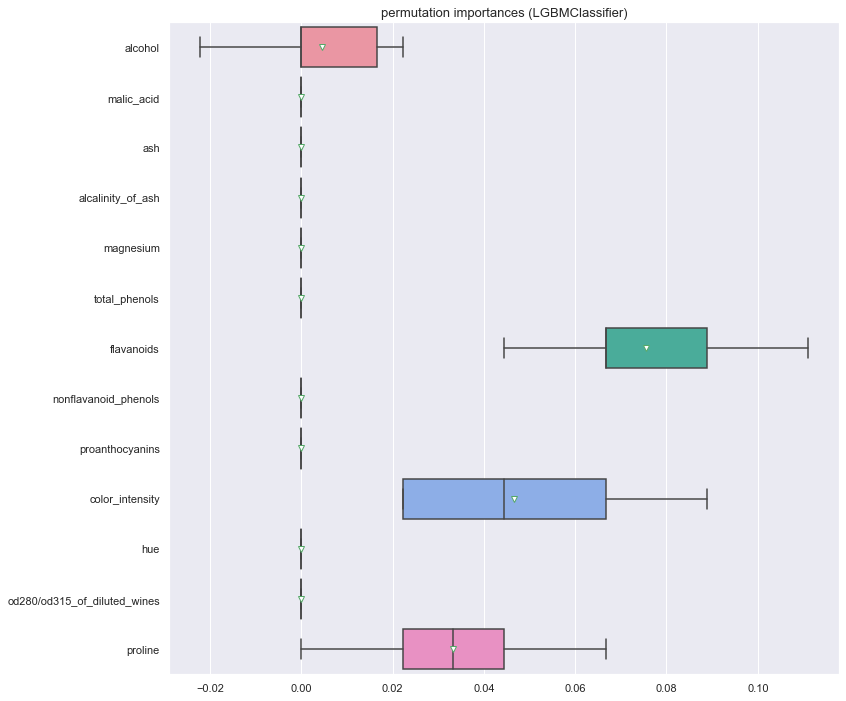

In [32]:
# 모델과 score를 따로 지정할 수도 있습니다.
clf_new.show_permutation_importances(
    estimators=["LGBMClassifier"],
    data=df_wine,
    target="label",
    scoring="accuracy",
)

##  Search Hyperparameters again
- 모델을 다시 튜닝해봅니다.
- 이미 `clf` 인스턴스가 만들어져 있으니 `search_hyperparameter()` 메서드만 재사용하시면 됩니다.
- 모델의 후보를 좁히거나, Feature를 바꾸거나, `search`, `kfold`, `n_splits` 등 파라미터 변경을 반복하여 사용할 수 있습니다.

In [33]:
hyperparams_space = {
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": np.arange(5, 105, 5).astype(int),
        "min_samples_split": np.arange(2, 11).astype(int),
        "min_samples_leaf": np.arange(2, 11).astype(int),
        "max_features": ["sqrt", "log2"],
    },
    "XGBClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "gamma": [i / 10.0 for i in range(3)],
        "fit_params": {"verbose": False},
        "eval_metric": ["mlogloss"],
        "early_stopping_rounds": [100],
    },
    "LGBMClassifier": {
        "n_estimators": np.linspace(100, 1000, 10).astype(int),
        "learning_rate": np.arange(0.001, 0.1, 0.01),
        "max_depth": np.arange(5, 105, 5).astype(int),
        "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
        "verbose": [-1],
        "fit_params": {
            "eval_metric": ["multi_logloss"],
            "callbacks": [early_stopping(100)],
        },
    },
}

clf_new.search_hyperparameter(
    data=df_wine,
    target="label",
    hyperparams_space=hyperparams_space,
    search_method="random",
    kfold="StratifiedKFold",
    scoring="accuracy",
    n_splits=10,
)

 -------------- Start to search best parameters by cross validation. -------------- 
 >>> DecisionTreeClassifier running... 
param_grid:
{'criterion': ['gini', 'entropy'],
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'splitter': ['best', 'random']}
fit_params: None
 Best Parameters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 85, 'criterion': 'gini'} 
 Finished. (elapsed_time: 0s) 
------------------------------------------------------------------------------
 >>> LGBMClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1267b6790>,
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[399]	valid_0's binary_logloss: 0.0390335
Did not meet early stopping. Best iteration is:
[399]	valid_0's binary_logloss: 0.0390335
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[399]	valid_0's binary_logloss: 0.0530621
Did not meet early stopping. Best iteration is:
[399]	valid_0's binary_logloss: 0.0530621
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[334]	valid_0's binary_logloss: 0.0508156
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.526313
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's binary_logloss: 0.0528601
Training until validation scores don't improve for 100 rounds

Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.585681
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.585826
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.585385
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[700]	valid_0's binary_logloss: 0.336137
Did not meet early stopping. Best iteration is:
[700]	valid_0's binary_logloss: 0.335176
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[700]	valid_0's binary_logloss: 0.332024
Early stopping, best iteration is:
[282]	valid_0's binary_logloss: 0.0732113
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[388]	valid_0's binary_logloss: 0.0455031
Did not meet early stopping. Best iteration is:
[38

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[486]	valid_0's binary_logloss: 0.0332699
Early stopping, best iteration is:
[486]	valid_0's binary_logloss: 0.0332699
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[110]	valid_0's binary_logloss: 0.0530194
Did not meet early stopping. Best iteration is:
[168]	valid_0's binary_logloss: 0.0444807
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[196]	valid_0's binary_logloss: 0.0472865
Did not meet early stopping. Best iteration is:
[196]	valid_0's binary_logloss: 0.0472865
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[700]	valid_0's binary_logloss: 0.327464
Did not meet early stopping. Best iteration is:
[700]	valid_0's binary_logloss: 0.327464
Training until validation scores don't improve for 100 round

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's multi_logloss: 0.0601031
 Best Parameters: {'colsample_bytree': 0.4999155806990782, 'learning_rate': 0.08099999999999999, 'max_depth': 30, 'n_estimators': 500, 'objective': 'multiclass', 'verbose': -1} 
 Finished. (elapsed_time: 4s) 
------------------------------------------------------------------------------
 >>> XGBClassifier running... 
param_grid:
{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126ad8e80>,
 'early_stopping_rounds': [100],
 'eval_metric': ['mlogloss'],
 'gamma': [0.0, 0.1, 0.2],
 'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
 'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'objective': ['multi:softprob']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,std_train_score,estimator_name,param_colsample_bytree,param_learning_rate,param_n_estimators,param_objective,param_verbose,param_early_stopping_rounds,param_eval_metric,param_gamma
0,0.000153,0.000036,0.000078,0.000010,random,2,2,sqrt,70,entropy,...,0.026049,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000156,0.000005,0.000072,0.000002,best,10,8,log2,55,gini,...,0.013777,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000188,0.000037,0.000083,0.000018,best,7,4,sqrt,75,gini,...,0.017924,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000184,0.000031,0.000079,0.000012,best,4,4,log2,85,gini,...,0.014389,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000188,0.000008,0.000075,0.000003,best,10,5,log2,35,entropy,...,0.020861,DecisionTreeClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.302883,0.101370,0.001006,0.000396,NaN,NaN,NaN,NaN,50,NaN,...,0.000000,XGBClassifier,0.702549,0.041,500,multi:softprob,NaN,100,mlogloss,0.0
146,0.151963,0.040199,0.001107,0.000525,NaN,NaN,NaN,NaN,45,NaN,...,0.000000,XGBClassifier,0.603926,0.051,300,multi:softprob,NaN,100,mlogloss,0.2
147,0.307640,0.103845,0.002925,0.004554,NaN,NaN,NaN,NaN,70,NaN,...,0.000000,XGBClassifier,0.703908,0.031,700,multi:softprob,NaN,100,mlogloss,0.1
148,0.158229,0.031083,0.001253,0.000822,NaN,NaN,NaN,NaN,95,NaN,...,0.000000,XGBClassifier,0.679035,0.011,200,multi:softprob,NaN,100,mlogloss,0.0


## Best Model
- 최종 모델을 확인해 봅니다. 이 코드를 실행하는 경로 내의 `model_savled` 폴더에 `.joblib` 파일로 생성되어 있습니다.

In [34]:
clf_new.get_best_model_info()

{'mean_test_score': 0.9923076923076923,
 'std_test_score': 0.02307692307692306,
 'mean_fit_time': 0.03025548458099365,
 'estimator_name': 'LGBMClassifier',
 'params': {'colsample_bytree': 0.4271997237997648,
  'learning_rate': 0.09099999999999998,
  'max_depth': 55,
  'n_estimators': 900,
  'objective': 'multiclass',
  'verbose': -1}}

In [35]:
# 최종 선택된 모델로 다시 예측해 봅니다.
features = df_wine.iloc[:, :-1].values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

best_model = clf_new.get_best_classifier()
pred = best_model.predict(features_scaled)

print(accuracy_score(df_wine["label"], pred))

 >>> Predict from new data. 
0.9943820224719101


## Load Model
- 로컬에 저장되어 있던 모델을 로드하여 실제 데이터로 다시 예측을 해봅니다. (`LGBMClassifier`이 저장된 것으로 가정)
- 이렇게 모델을 주기적으로 업데이트하여 저장해놓고, 업데이트된 모델을 실 예측에 사용하는 파이프라인 배치를 만들면 됩니다.

In [36]:
model = load("model_saved/LGBMClassifier.joblib")
pred = model.predict(X=features_scaled)

print(accuracy_score(df_wine["label"], pred))

0.9943820224719101


## Decision Tree
- (Appendix) `Decision Tree`를 튜닝한 경우, 트리 구조를 시각화해봅니다.

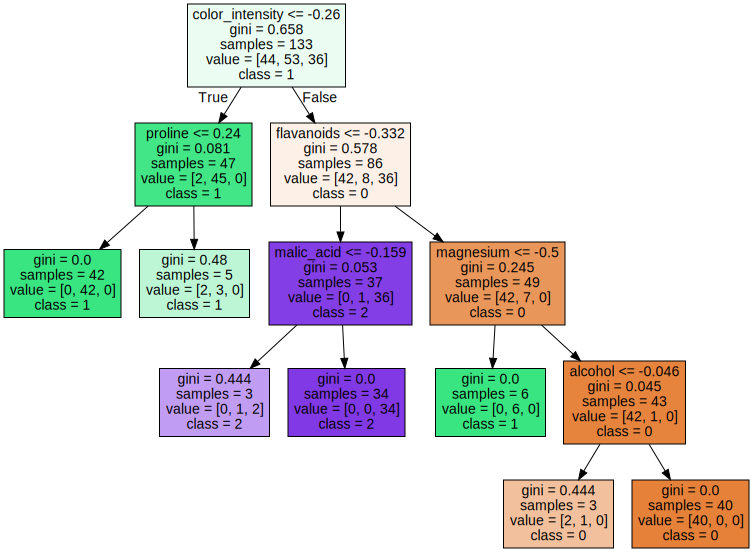

In [45]:
clf_new.show_decision_tree(
    feature_names=df_wine.columns[:-1], class_names=[str(i) for i in np.unique(wine["target"])]
)